In [1]:
# KHOÁ LUẬN TỐT NGHIỆP - SOURCE CODE
# Họ và tên: Lại Minh Phú - MSSV: 20127593
# Họ và tên: Hồ Minh Thanh Tài - MSSV: 20127068

In [2]:
%pip install imblearn
%pip install lightgbm
%pip install xgboost
%pip install catboost
%pip install --quiet optuna



Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [45]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.decomposition import PCA
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn import datasets, linear_model, metrics
from imblearn.over_sampling import SMOTE

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
import xgboost as xgb
import catboost as cb

#Unsupervised Libraries
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

%matplotlib inline
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_curve, precision_recall_curve, auc, ConfusionMatrixDisplay

# Other Libraries
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
import collections
from collections import Counter
import warnings
warnings.filterwarnings("ignore")


In [4]:
df = pd.read_csv("creditcard.csv")
df

Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.018307  0.277838   
1      -0.082361 -0.078803  0.085102 -0.255425  ... -0.225775 -0.638672   
2       1.800499  0.791461  0.247676 -1.514654  ...  0.247998  0.771679   
3       1.247203  0.237609  0.377436 -1.387024  ... -0.108300  0.005274   
4       0.095921  0.592941 -0.270533  0.817739  ... -0.009431  0.798278   
...          ...       ...       ...       ...  ...       ...       ...   
284802 -2.606837 -4.918215  7.305334  1.914428  ...  0.213454  0.111864   
284803  1.058415  0.024330  0.294869  0.584800  ...  0.214205  0.924384   
284804  3.031260 -0.296827  0.708417  0.432454  ...  0.232045  0.578229   
284805  0.623708 -0.686180  0.679145  0.392087  ...  0.265245  0.800049   
284806 -0.649617  1.577006 -0.414650  0.486180  ...  0.261057  0.643078   

             V23       V24       V25       V26       V27       V28  Amount  \
0      -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053  149.62   
1       0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724    2.69   
2       0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752  378.66   
3      -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458  123.50   
4      -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   69.99   
...          ...       ...       ...       ...       ...       ...     ...   
284802  1.014480 -0.509348  1.436807  0.250034  0.943651  0.823731    0.77   
284803  0.012463 -1.016226 -0.606624 -0.395255  0.068472 -0.053527   24.79   
284804 -0.037501  0.640134  0.265745 -0.087371  0.004455 -0.026561   67.88   
284805 -0.163298  0.123205 -0.569159  0.546668  0.108821  0.104533   10.00   
284806  0.376777  0.008797 -0.473649 -0.818267 -0.002415  0.013649  217.00   

        Class  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
284802      0  
284803      0  
284804      0  
284805      0  
284806      0  

[284807 rows x 31 columns]

In [5]:
# 284315 Not-Fraud, 492 Fraud
df["Class"].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [6]:
x = df.drop(['Class','Time'], axis=1)

y = df['Class']

## Spilt thành tập train và tập test

In [7]:
seed = 42

# Split the data into train, test, and validation sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = seed)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((227845, 29), (56962, 29), (227845,), (56962,))

## Scale 

In [8]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
X_train

array([[ 8.66514037e-01, -3.18740903e-01, -2.57831791e-01, ...,
         2.69826619e-01, -4.45139004e-01, -1.67972028e-01],
       [-1.87412161e-01, -4.94335107e-01,  7.18249023e-01, ...,
        -2.29014575e+00, -1.18801493e+00,  3.34265734e-01],
       [ 2.43934573e-02,  5.38221071e-01, -3.86388287e-01, ...,
         1.26284605e+00,  4.48261891e-01, -1.40000000e-01],
       ...,
       [-7.36254539e-02,  6.61185829e-01,  7.02202848e-01, ...,
        -7.54486386e-01, -1.57908244e+00, -2.52587413e-01],
       [-1.32706845e+00,  1.63267692e+00, -1.40917571e+00, ...,
         3.05218623e+00,  2.46838464e+00, -2.93706294e-01],
       [ 5.43598556e-01, -6.06975975e-01,  1.08415011e-01, ...,
        -8.78479616e-04,  2.07096240e-01,  1.27272727e+00]])

In [10]:
X_test

array([[-7.40091104e+00,  6.07683172e+00, -9.82623873e+00, ...,
        -1.24410856e+01, -8.01989481e+00,  4.78587413e+00],
       [ 1.43967206e-01, -2.00432112e+00, -1.63402851e-01, ...,
         2.44127890e-01,  6.89809266e-01,  6.96671329e+00],
       [ 6.18042059e-01, -4.68482847e-01, -5.43876581e-03, ...,
         6.18960568e-02, -5.12163588e-02,  1.25874126e-01],
       ...,
       [ 1.00485653e-02, -1.25394779e-01, -7.54347971e-01, ...,
         2.19564896e+00,  2.60956835e+00, -2.00979021e-01],
       [-2.29493924e-01,  6.60140661e-01,  7.78913926e-01, ...,
         2.41254081e-01, -2.13886375e+00, -2.57482517e-01],
       [-7.19520654e-01,  6.60807294e-01, -3.61072611e-01, ...,
         7.66141087e-01, -4.70610893e+00,  1.23679720e+01]])

## SMOTE

In [11]:
print('Kích thước tập dữ liệu trước SMOTE %s' % Counter(y_train))

smt = SMOTE(random_state=42)
X_train_smt, y_train_smt = smt.fit_resample(X_train, y_train)

print('Kích thước tập dữ liệu trước SMOTE %s' % Counter(y_train_smt))

Kích thước tập dữ liệu trước SMOTE Counter({0: 227451, 1: 394})
Kích thước tập dữ liệu trước SMOTE Counter({0: 227451, 1: 227451})


### Biểu diễn đồ thị ROC-AUC

In [12]:
def plot_roc_cur(FPR, TPR):  
    plt.plot(FPR, TPR, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

### Biểu diễn đồ thị PR-AUC

In [13]:
def plot_pr_cur(precision, recall, pr_auc):
    plt.plot(recall, precision, color='orange', label=f'PR AUC = {pr_auc:.2f}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.show()

### Hàm chạy mô hình

In [14]:
def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    t0=time.time()
    if verbose == False:
        model.fit(X_train,y_train, verbose=0)
    else:
        model.fit(X_train,y_train)
    
    y_pred = model.predict(X_test)
    
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    
    precision, recall, _ = precision_recall_curve(y_test, y_pred)
    pr_auc = auc(recall, precision)
    
    time_taken = time.time()-t0
    
#   print("Precision  = {}".format(precision))
#   print("Recall  = {}".format(recall))
    print("F1 Score  = {}".format(f1))
    print("Accuracy = {}".format(accuracy))
    print("ROC Area under Curve = {}".format(roc_auc))
    print("Area under Precision-Recall Curve = {}".format(pr_auc))
    print("Time taken = {}".format(time_taken))
    
    print(classification_report(y_test,y_pred,digits=5))
    
    probs = model.predict_proba(X_test)  
    probs = probs[:, 1]  
    FPR, TPR, thresholds = roc_curve(y_test, probs) 
    plot_roc_cur(FPR, TPR)
    plot_pr_cur(precision, recall, pr_auc)
    
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
    
    return model, f1, accuracy, roc_auc, pr_auc, time_taken

# SUPERVISED (LightGBM, KNeighbor, LogisticRegression, RandomForest, SVC, XGBoost, CatBoost)

## LightGBM 

[LightGBM] [Info] Number of positive: 394, number of negative: 227451
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.074028 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 227845, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001729 -> initscore=-6.358339
[LightGBM] [Info] Start training from score -6.358339
F1 Score  = 0.23616236162361623
Accuracy = 0.9963659983848882
ROC Area under Curve = 0.6620255058973505
Area under Precision-Recall Curve = 0.2563301888462119
Time taken = 4.015583276748657
              precision    recall  f1-score   support

           0    0.99884   0.99752   0.99818     56864
           1    0.18497   0.32653   0.23616        98

    accuracy                        0.99637     56962
   macro avg    0.59190   0.66203   0.61717     56962
weighted avg    0.99744   0.99637   0.99687 

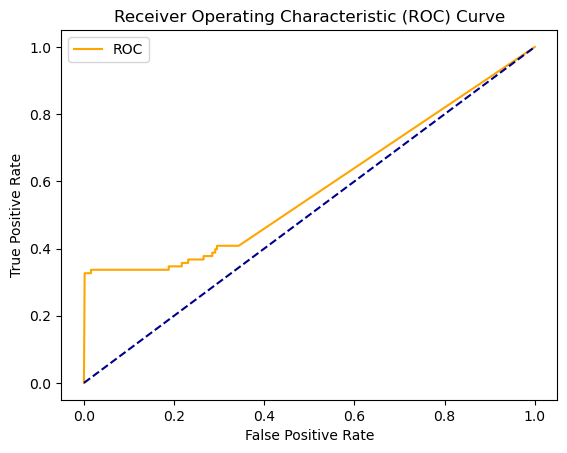

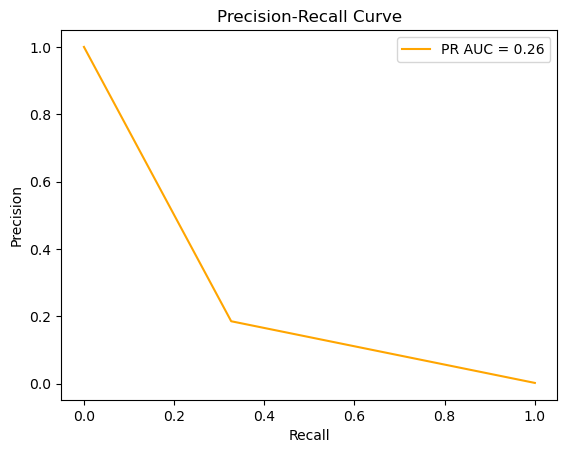

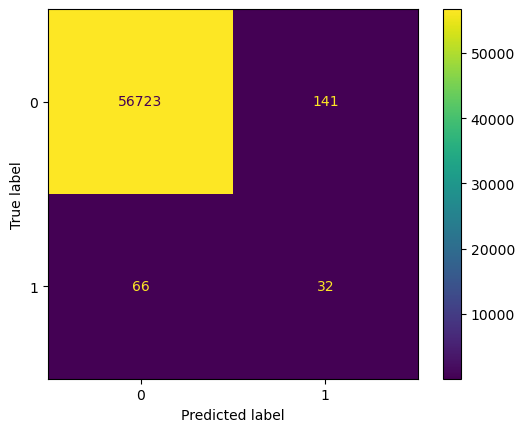

In [15]:
model_lgbsmt = lgb.LGBMClassifier()

model_lgbsmt, f1_score_lgbsmt, accuracy_lgbsmt, roc_auc_lgbsmt, pr_auc_lgbsmt, tt_lgbsmt = run_model(model_lgbsmt, X_train, y_train, X_test, y_test)

## LightGBM + SMOTE

[LightGBM] [Info] Number of positive: 227451, number of negative: 227451
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.073959 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 454902, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
F1 Score  = 0.688
Accuracy = 0.9986306660580738
ROC Area under Curve = 0.9381951781838227
Area under Precision-Recall Curve = 0.7217755804263352
Time taken = 7.058587312698364
              precision    recall  f1-score   support

           0    0.99979   0.99884   0.99931     56864
           1    0.56579   0.87755   0.68800        98

    accuracy                        0.99863     56962
   macro avg    0.78279   0.93820   0.84366     56962
weighted avg    0.99904   0.99863   0.99878     56962



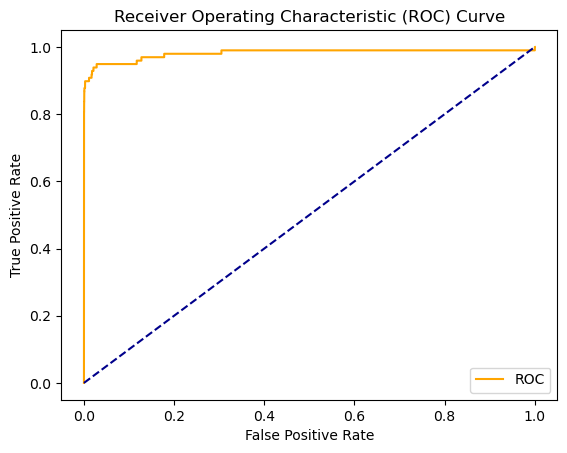

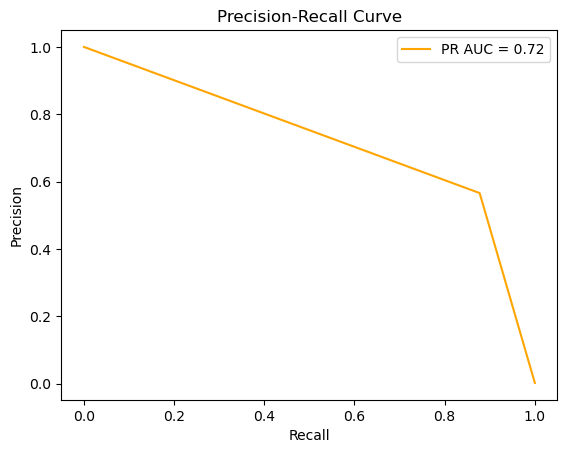

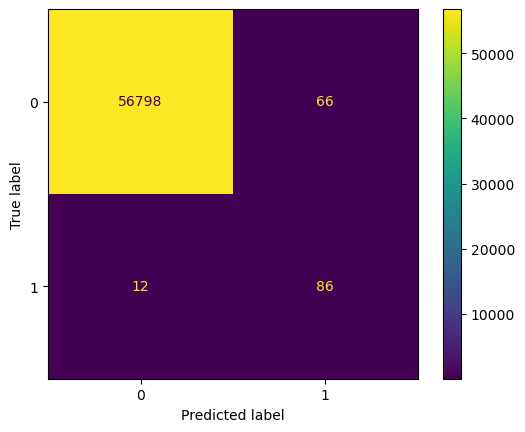

In [16]:
model_lgbsmt = lgb.LGBMClassifier()

model_lgbsmt, f1_score_lgbsmt, accuracy_lgbsmt, roc_auc_lgbsmt, pr_auc_lgbsmt, tt_lgbsmt= run_model(model_lgbsmt, X_train_smt, y_train_smt, X_test, y_test)

## KNeighborsClassifier

F1 Score  = 0.8390804597701149
Accuracy = 0.9995084442259752
ROC Area under Curve = 0.8724226008636431
Area under Precision-Recall Curve = 0.8529315820285489
Time taken = 53.357786893844604
              precision    recall  f1-score   support

           0    0.99956   0.99995   0.99975     56864
           1    0.96053   0.74490   0.83908        98

    accuracy                        0.99951     56962
   macro avg    0.98004   0.87242   0.91942     56962
weighted avg    0.99949   0.99951   0.99948     56962



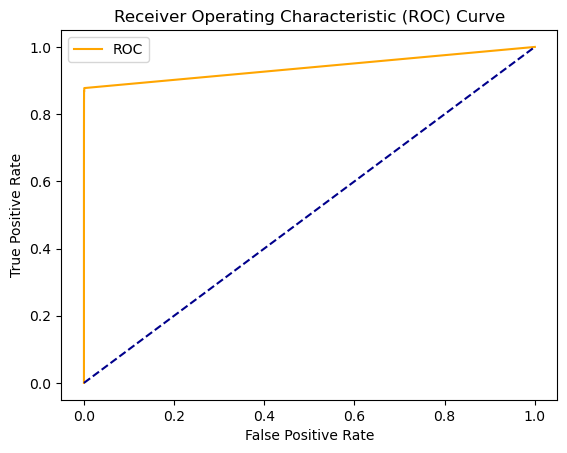

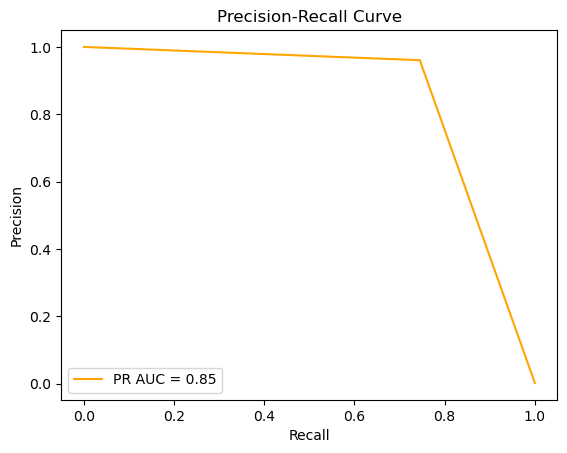

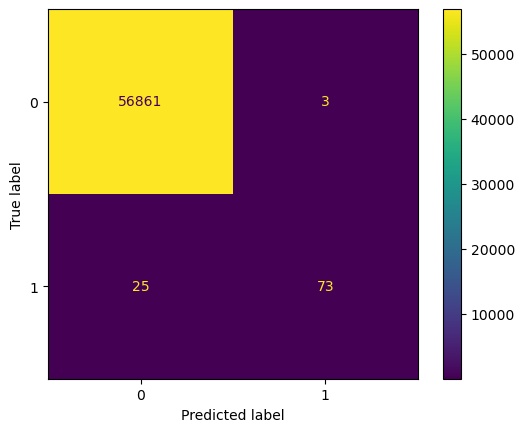

In [17]:
knn_clf = KNeighborsClassifier(weights='distance', n_neighbors=4)

knn_clf, f1_score_knn, accuracy_knn, roc_auc_knn, pr_auc_knn, tt_knn = run_model(knn_clf, X_train, y_train, X_test, y_test)

## KNeighborsClassifier +SMOTE

F1 Score  = 0.631578947368421
Accuracy = 0.9982795547909132
ROC Area under Curve = 0.9278328241820083
Area under Precision-Recall Curve = 0.6786943175149347
Time taken = 91.54185366630554
              precision    recall  f1-score   support

           0    0.99975   0.99852   0.99914     56864
           1    0.50000   0.85714   0.63158        98

    accuracy                        0.99828     56962
   macro avg    0.74988   0.92783   0.81536     56962
weighted avg    0.99889   0.99828   0.99851     56962



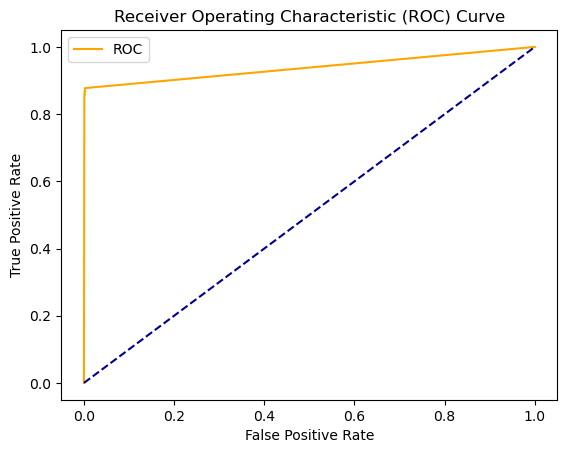

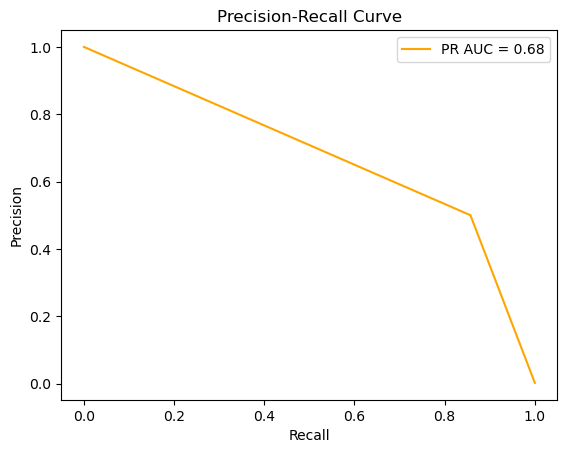

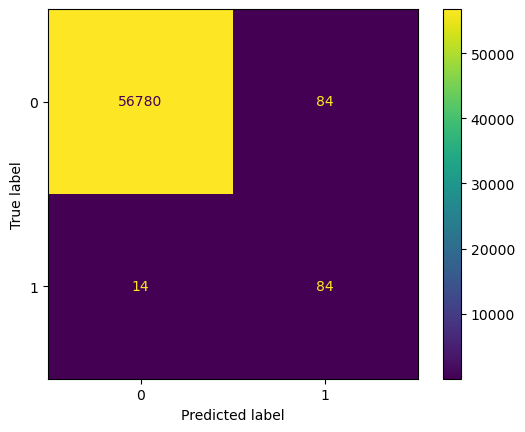

In [18]:
knn_clf, f1_score_knn, accuracy_knn, roc_auc_knn, pr_auc_knn, tt_knn = run_model(knn_clf, X_train_smt, y_train_smt, X_test, y_test)

## LogisticRegression

F1 Score  = 0.6951219512195121
Accuracy = 0.9991222218320986
ROC Area under Curve = 0.7907371903460314
Area under Precision-Recall Curve = 0.7229943973976337
Time taken = 11.954006671905518
              precision    recall  f1-score   support

           0    0.99928   0.99984   0.99956     56864
           1    0.86364   0.58163   0.69512        98

    accuracy                        0.99912     56962
   macro avg    0.93146   0.79074   0.84734     56962
weighted avg    0.99905   0.99912   0.99904     56962



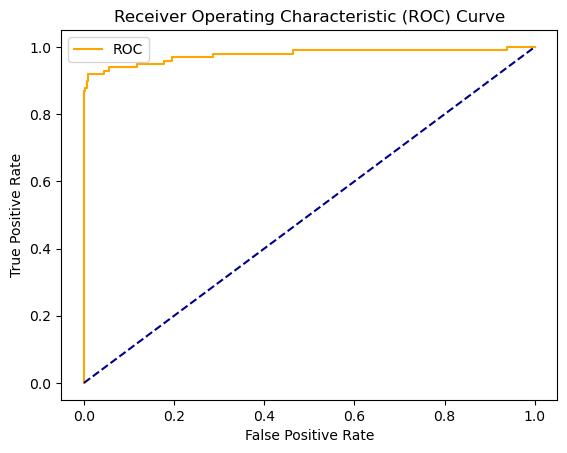

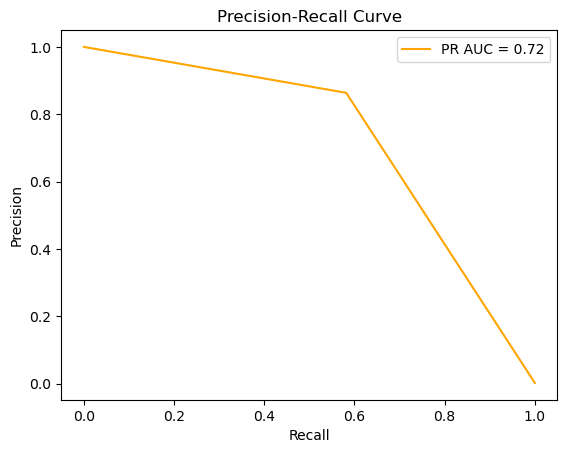

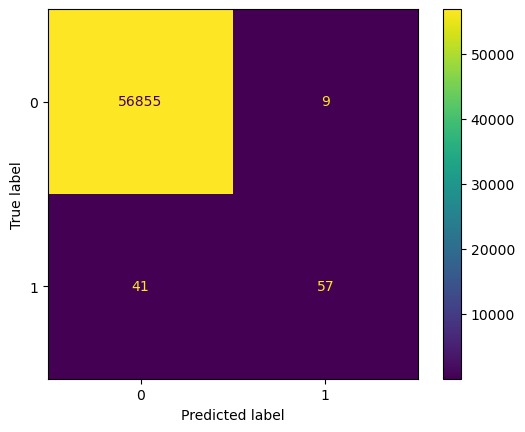

In [19]:
params_lr = {'penalty': 'l1', 'solver':'liblinear'}

model_lrsmt = LogisticRegression(**params_lr)

model_lrsmt,f1_score_lrsmt,accuracy_lrsmt, roc_auc_lrsmt, pr_auc_lrsmt, tt_lrsmt = run_model(model_lrsmt, X_train, y_train, X_test, y_test)
     

## LogisticRegression + SMOTE

F1 Score  = 0.10588235294117647
Accuracy = 0.9733155436957972
ROC Area under Curve = 0.945888794459821
Area under Precision-Recall Curve = 0.4873437833632693
Time taken = 20.570982694625854
              precision    recall  f1-score   support

           0    0.99986   0.97341   0.98646     56864
           1    0.05618   0.91837   0.10588        98

    accuracy                        0.97332     56962
   macro avg    0.52802   0.94589   0.54617     56962
weighted avg    0.99823   0.97332   0.98494     56962



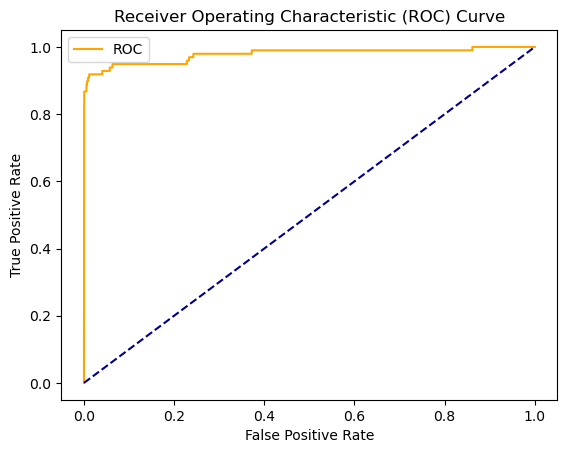

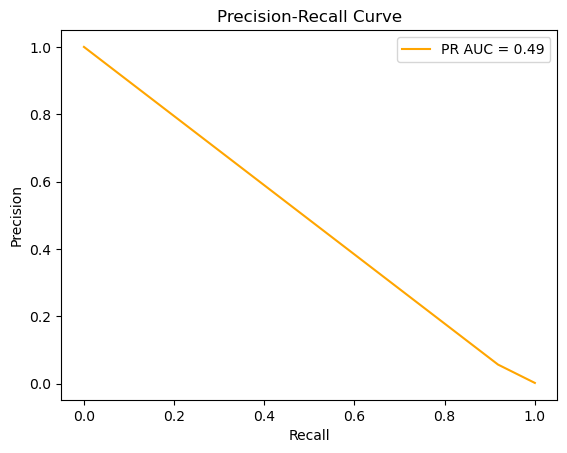

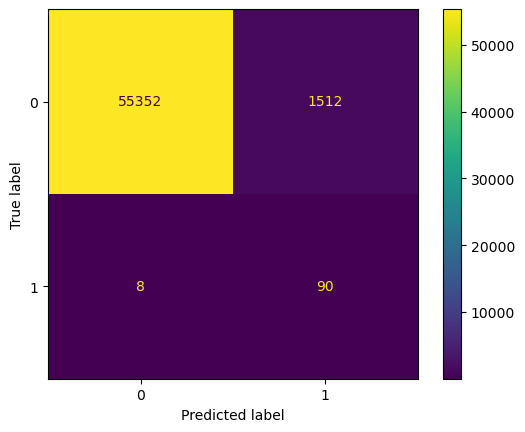

In [20]:
model_lrsmt,f1_score_lrsmt,accuracy_lrsmt, roc_auc_lrsmt, pr_auc_lrsmt, tt_lrsmt = run_model(model_lrsmt, X_train_smt, y_train_smt, X_test, y_test)

## RandomForest

F1 Score  = 0.8700564971751412
Accuracy = 0.9995962220427653
ROC Area under Curve = 0.892839557038347
Area under Precision-Recall Curve = 0.8803832484243008
Time taken = 281.40855383872986
              precision    recall  f1-score   support

           0    0.99963   0.99996   0.99980     56864
           1    0.97468   0.78571   0.87006        98

    accuracy                        0.99960     56962
   macro avg    0.98716   0.89284   0.93493     56962
weighted avg    0.99959   0.99960   0.99957     56962



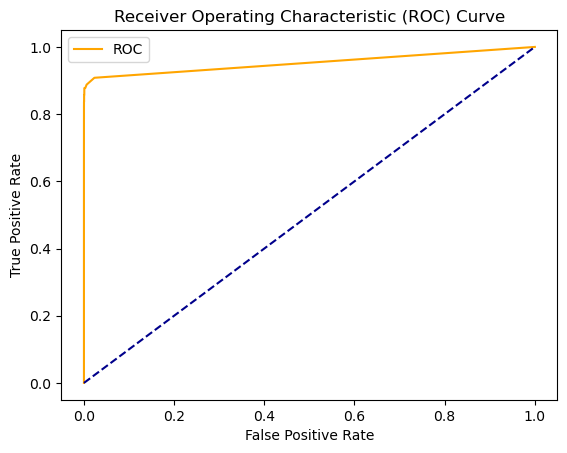

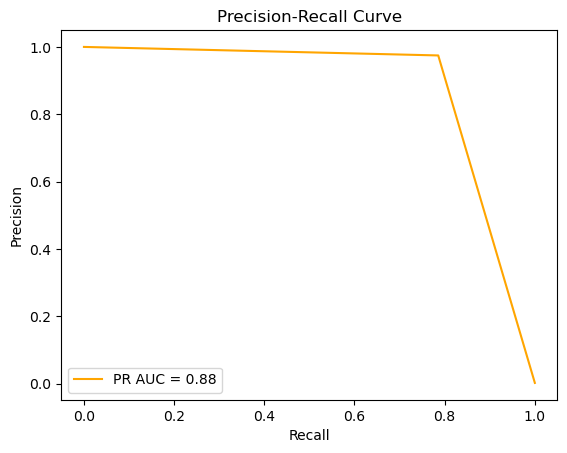

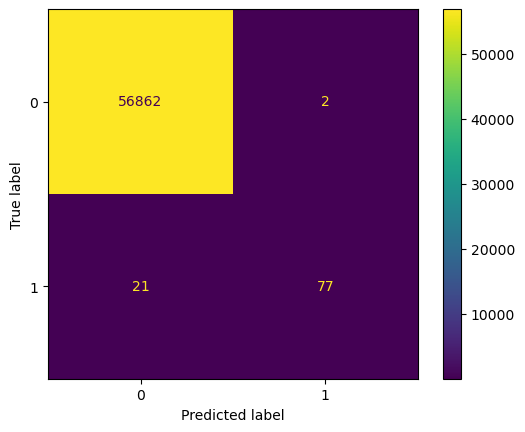

In [21]:
from sklearn.ensemble import RandomForestClassifier

model_rfsmt = RandomForestClassifier()
model_rfsmt,f1_score_rfsmt,accuracy_rfsmt, roc_auc_rfsmt, pr_auc_rfsmt, tt_rfsmt = run_model(model_rfsmt, X_train, y_train, X_test, y_test)
     

## RandomForest + SMOTE

F1 Score  = 0.8691099476439791
Accuracy = 0.9995611109160493
ROC Area under Curve = 0.9233814586611235
Area under Precision-Recall Curve = 0.8698376136200723
Time taken = 555.7683646678925
              precision    recall  f1-score   support

           0    0.99974   0.99982   0.99978     56864
           1    0.89247   0.84694   0.86911        98

    accuracy                        0.99956     56962
   macro avg    0.94610   0.92338   0.93445     56962
weighted avg    0.99955   0.99956   0.99956     56962



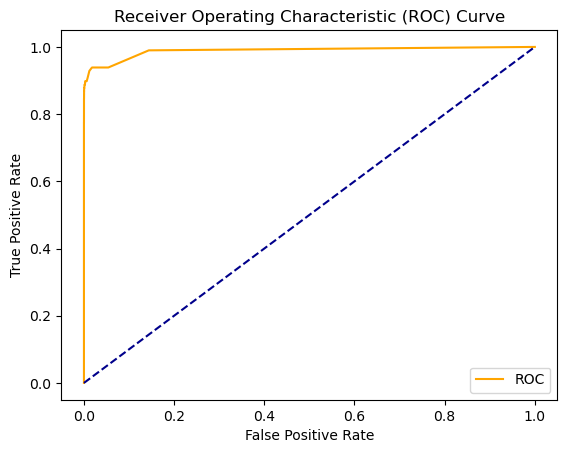

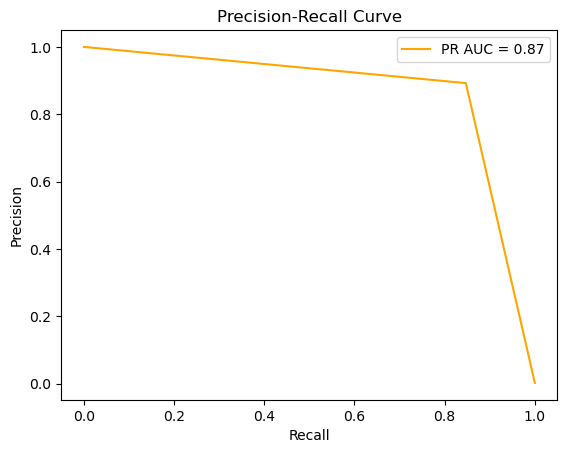

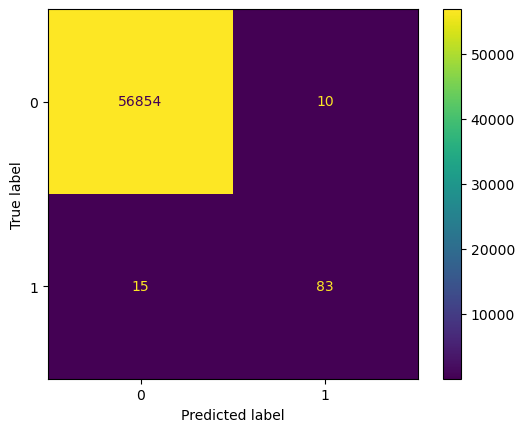

In [22]:
from sklearn.ensemble import RandomForestClassifier

model_rfsmt = RandomForestClassifier()
model_rfsmt, f1_score_rfsmt, accuracy_rfsmt, roc_auc_rfsmt, pr_auc_rfsmt, tt_rfsmt = run_model(model_rfsmt, X_train_smt, y_train_smt, X_test, y_test)
     

### DecisionTree 

F1 Score  = 0.8064516129032258
Accuracy = 0.9993679997191109
ROC Area under Curve = 0.8825387534023176
Area under Precision-Recall Curve = 0.8089913138394708
Time taken = 4.58980655670166
              precision    recall  f1-score   support

           0    0.99960   0.99977   0.99968     56864
           1    0.85227   0.76531   0.80645        98

    accuracy                        0.99937     56962
   macro avg    0.92593   0.88254   0.90307     56962
weighted avg    0.99934   0.99937   0.99935     56962



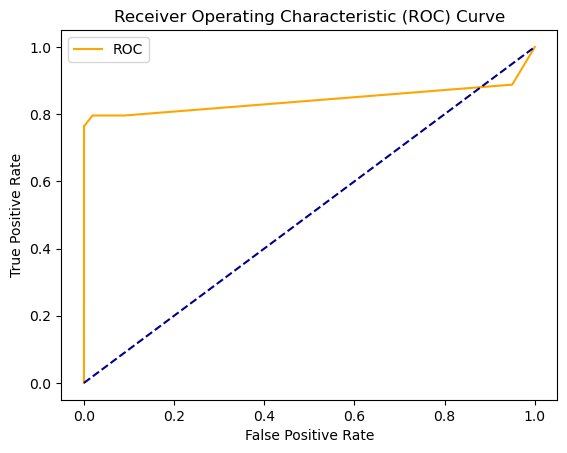

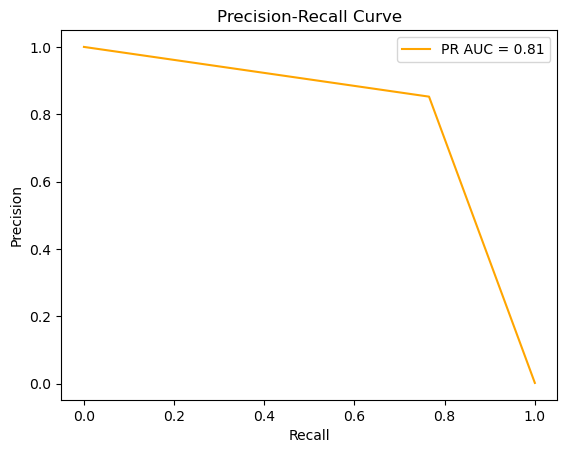

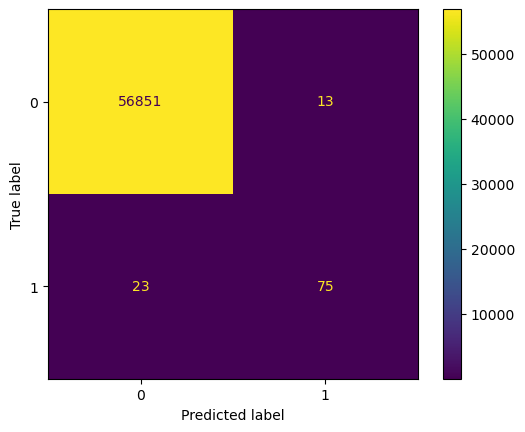

In [23]:
from sklearn.tree import DecisionTreeClassifier
params_dt = {'max_depth': 16,
             'max_features': "sqrt"}

model_dtsmt = DecisionTreeClassifier(**params_dt)
model_dtsmt, f1_score_dtsmt, accuracy_dtsmt, roc_auc_dtsmt, pr_auc_dtsmt, tt_dtsmt = run_model(model_dtsmt, X_train, y_train, X_test,y_test)

### DecisionTree + SMOTE

F1 Score  = 0.3815789473684211
Accuracy = 0.9950493311330361
ROC Area under Curve = 0.9414946725735877
Area under Precision-Recall Curve = 0.5654824865071455
Time taken = 7.581577777862549
              precision    recall  f1-score   support

           0    0.99981   0.99523   0.99751     56864
           1    0.24302   0.88776   0.38158        98

    accuracy                        0.99505     56962
   macro avg    0.62141   0.94149   0.68955     56962
weighted avg    0.99850   0.99505   0.99646     56962



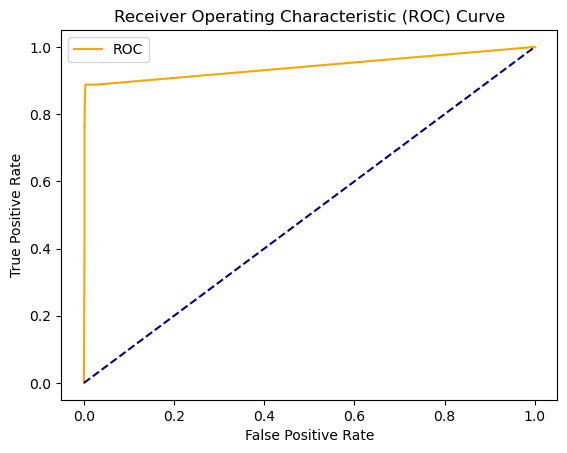

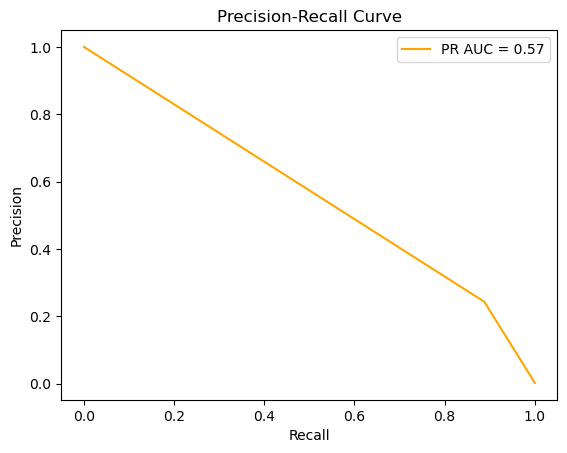

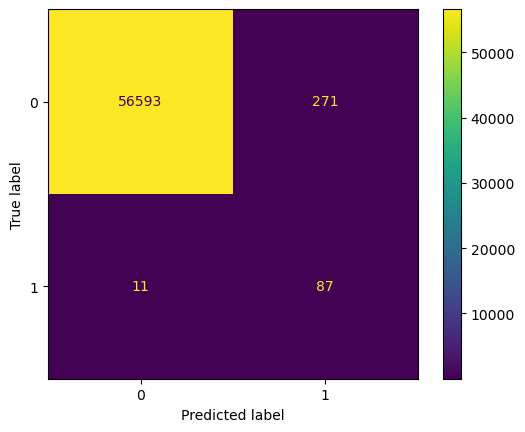

In [24]:
model_dtsmt, f1_score_dtsmt, accuracy_dtsmt, roc_auc_dtsmt, pr_auc_dtsmt, tt_dtsmt = run_model(model_dtsmt, X_train_smt, y_train_smt, X_test,y_test)

### XGBoost

F1 Score  = 0.847457627118644
Accuracy = 0.9995259997893332
ROC Area under Curve = 0.8826178895868984
Area under Precision-Recall Curve = 0.8575384945069046
Time taken = 2.217574119567871
              precision    recall  f1-score   support

           0    0.99960   0.99993   0.99976     56864
           1    0.94937   0.76531   0.84746        98

    accuracy                        0.99953     56962
   macro avg    0.97448   0.88262   0.92361     56962
weighted avg    0.99951   0.99953   0.99950     56962



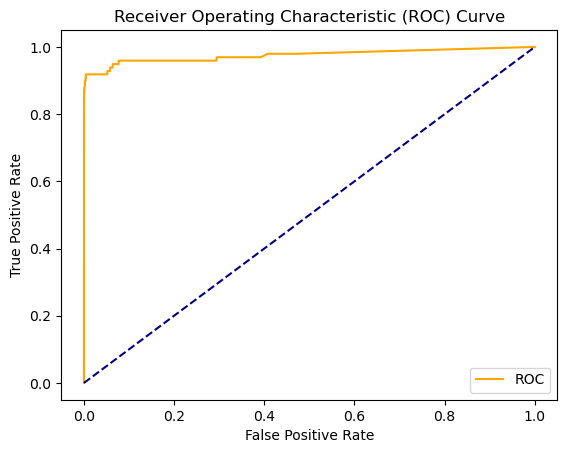

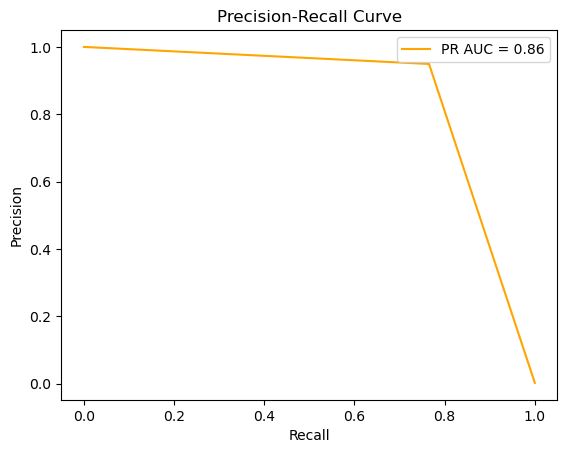

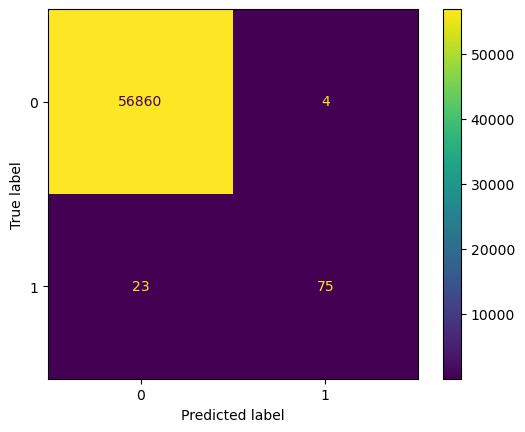

In [25]:
params_xgb ={'n_estimators': 20,
            'max_depth': 16}

model_xgbsmt = xgb.XGBClassifier(**params_xgb)
model_xgbsmt, f1_score_xgbsmt, accuracy_xgbsmt, roc_auc_xgbsmt, pr_auc_xgbsmt, tt_xgbsmt = run_model(model_xgbsmt, X_train, y_train, X_test, y_test)
     

### XGBoost + SMOTE

F1 Score  = 0.803921568627451
Accuracy = 0.9992977774656788
ROC Area under Curve = 0.9181563171132269
Area under Precision-Recall Curve = 0.8053002442758285
Time taken = 6.53521203994751
              precision    recall  f1-score   support

           0    0.99972   0.99958   0.99965     56864
           1    0.77358   0.83673   0.80392        98

    accuracy                        0.99930     56962
   macro avg    0.88665   0.91816   0.90178     56962
weighted avg    0.99933   0.99930   0.99931     56962



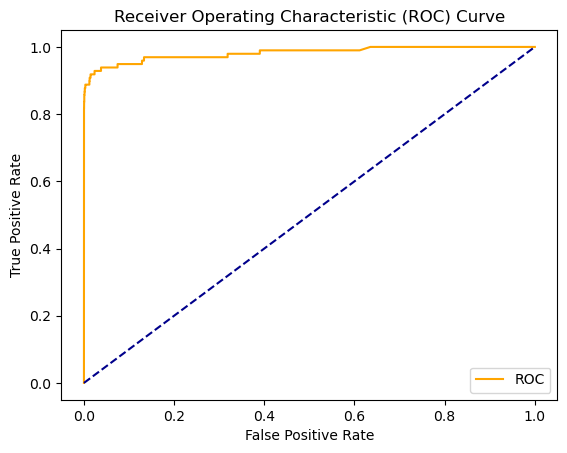

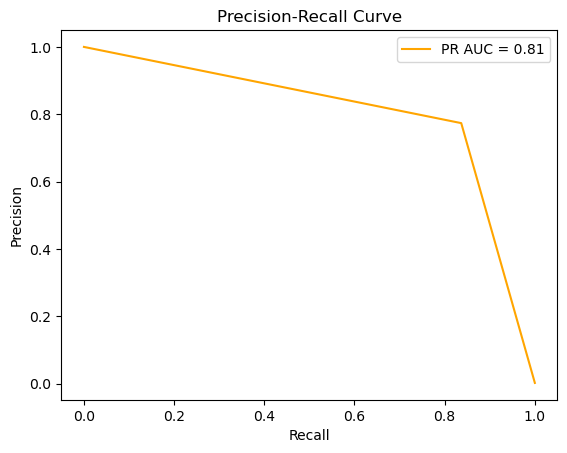

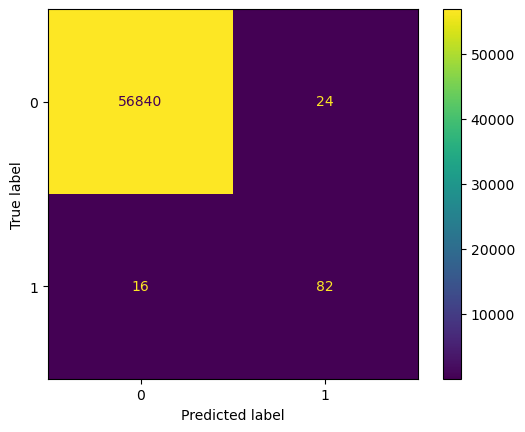

In [26]:
model_xgbsmt, f1_score_xgbsmt, accuracy_xgbsmt, roc_auc_xgbsmt, pr_auc_xgbsmt, tt_xgbsmt = run_model(model_xgbsmt, X_train_smt, y_train_smt, X_test, y_test)


### CatBoost

Learning rate set to 0.5
0:	learn: 0.0369016	total: 16.5s	remaining: 5m 13s
1:	learn: 0.0080193	total: 31.5s	remaining: 4m 43s
2:	learn: 0.0046350	total: 42s	remaining: 3m 57s
3:	learn: 0.0035516	total: 54.7s	remaining: 3m 38s
4:	learn: 0.0027589	total: 1m 6s	remaining: 3m 18s
5:	learn: 0.0022880	total: 1m 18s	remaining: 3m 2s
6:	learn: 0.0019234	total: 1m 29s	remaining: 2m 46s
7:	learn: 0.0016353	total: 1m 41s	remaining: 2m 32s
8:	learn: 0.0014243	total: 1m 52s	remaining: 2m 18s
9:	learn: 0.0012724	total: 2m 4s	remaining: 2m 4s
10:	learn: 0.0010896	total: 2m 16s	remaining: 1m 51s
11:	learn: 0.0009375	total: 2m 34s	remaining: 1m 43s
12:	learn: 0.0008584	total: 2m 51s	remaining: 1m 32s
13:	learn: 0.0007711	total: 3m 19s	remaining: 1m 25s
14:	learn: 0.0006864	total: 3m 36s	remaining: 1m 12s
15:	learn: 0.0006189	total: 3m 51s	remaining: 58s
16:	learn: 0.0005767	total: 4m 7s	remaining: 43.7s
17:	learn: 0.0005236	total: 4m 28s	remaining: 29.9s
18:	learn: 0.0004846	total: 4m 49s	remaining: 1

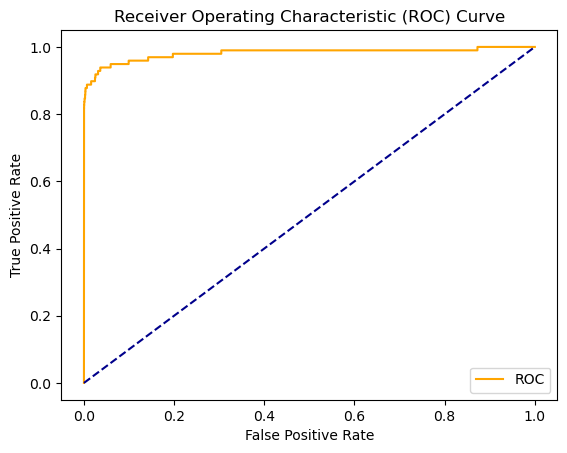

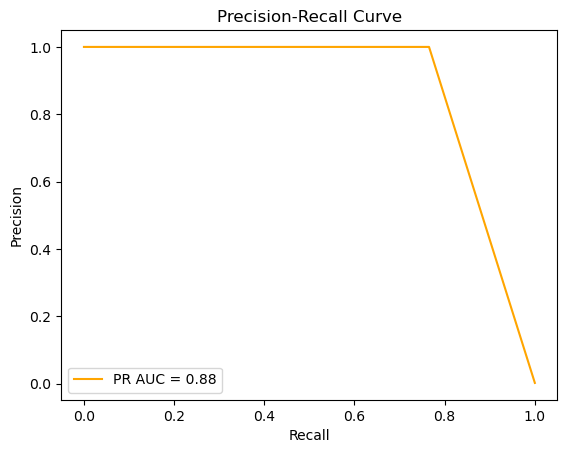

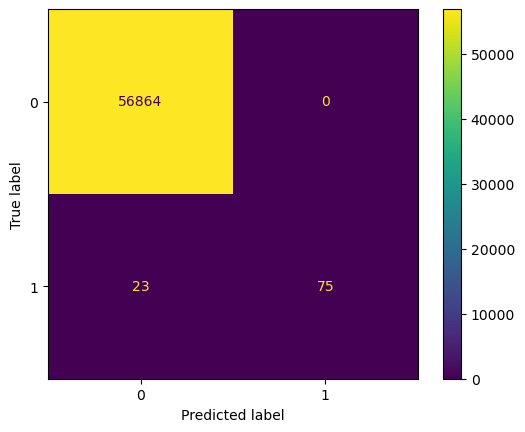

In [27]:
params_cb ={'iterations': 20,
            'max_depth': 16}

model_cbsmt = cb.CatBoostClassifier(**params_cb)
model_cbsmt, f1_score_cbsmt, accuracy_cbsmt, roc_auc_cbsmt , pr_auc_cbsmt, tt_cbsmt = run_model(model_cbsmt, X_train, y_train, X_test, y_test)

### CatBoost + SMOTE

Learning rate set to 0.5
0:	learn: 0.0975313	total: 26s	remaining: 8m 13s
1:	learn: 0.0363890	total: 50.9s	remaining: 7m 38s
2:	learn: 0.0194832	total: 1m 13s	remaining: 6m 54s
3:	learn: 0.0124032	total: 1m 33s	remaining: 6m 12s
4:	learn: 0.0083278	total: 1m 52s	remaining: 5m 36s
5:	learn: 0.0062779	total: 2m 11s	remaining: 5m 5s
6:	learn: 0.0048889	total: 2m 29s	remaining: 4m 38s
7:	learn: 0.0039155	total: 2m 48s	remaining: 4m 12s
8:	learn: 0.0029616	total: 3m 3s	remaining: 3m 44s
9:	learn: 0.0025822	total: 3m 15s	remaining: 3m 15s
10:	learn: 0.0021711	total: 3m 30s	remaining: 2m 52s
11:	learn: 0.0018193	total: 3m 44s	remaining: 2m 29s
12:	learn: 0.0016379	total: 3m 58s	remaining: 2m 8s
13:	learn: 0.0014651	total: 4m 11s	remaining: 1m 47s
14:	learn: 0.0013165	total: 4m 23s	remaining: 1m 27s
15:	learn: 0.0011150	total: 4m 36s	remaining: 1m 9s
16:	learn: 0.0009916	total: 4m 48s	remaining: 50.9s
17:	learn: 0.0009430	total: 5m	remaining: 33.4s
18:	learn: 0.0008855	total: 5m 11s	remaining:

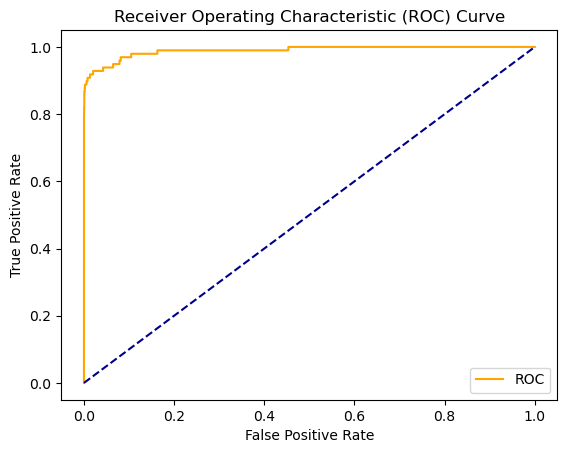

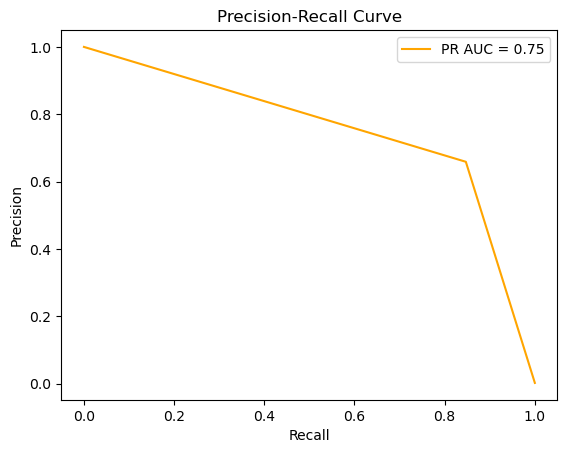

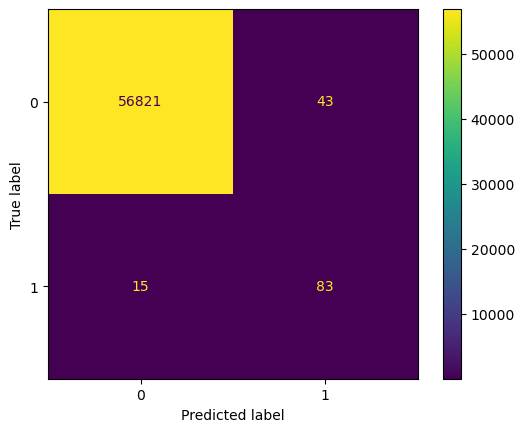

In [28]:
model_cbsmt, f1_score_cbsmt, accuracy_cbsmt, roc_auc_cbsmt , pr_auc_cbsmt, tt_cbsmt= run_model(model_cbsmt, X_train_smt, y_train_smt, X_test, y_test)

### Adaboost 

F1 Score  = 0.8022598870056498
Accuracy = 0.999385555282469
ROC Area under Curve = 0.8621745546840007
Area under Precision-Recall Curve = 0.8118489866721119
Time taken = 166.71634554862976
              precision    recall  f1-score   support

           0    0.99953   0.99986   0.99969     56864
           1    0.89873   0.72449   0.80226        98

    accuracy                        0.99939     56962
   macro avg    0.94913   0.86217   0.90098     56962
weighted avg    0.99935   0.99939   0.99935     56962



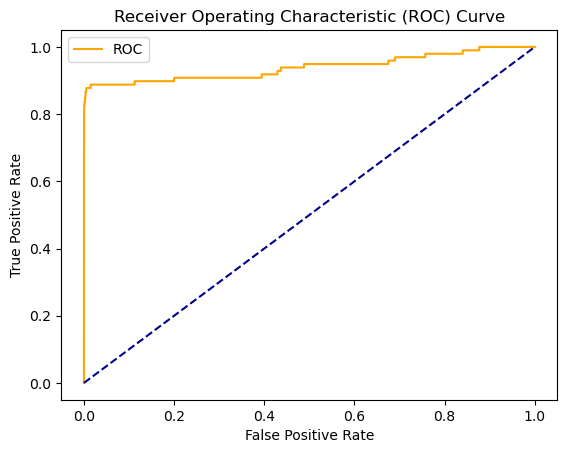

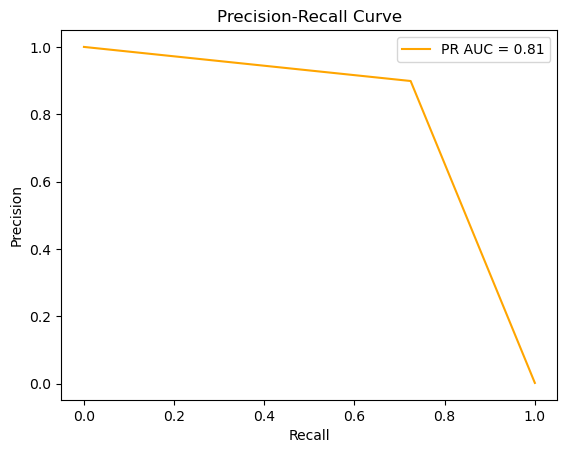

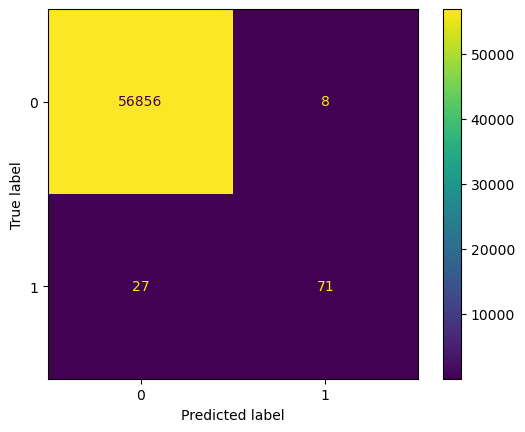

In [30]:
from sklearn.ensemble import AdaBoostClassifier
model_adasmt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2),
                                  n_estimators=50,
                                  algorithm="SAMME.R",
                                  learning_rate=0.5)
model_adasmt, f1_score_adasmt, accuracy_adasmt, roc_auc_adasmt, pr_auc_adasmt, tt_adasmt = run_model(model_adasmt, X_train, y_train, X_test, y_test)

### Adaboost + SMOTE

F1 Score  = 0.20899149453219928
Accuracy = 0.9885713282539237
ROC Area under Curve = 0.933156841098848
Area under Precision-Recall Curve = 0.49819118841181603
Time taken = 408.73206639289856
              precision    recall  f1-score   support

           0    0.99979   0.98876   0.99424     56864
           1    0.11862   0.87755   0.20899        98

    accuracy                        0.98857     56962
   macro avg    0.55920   0.93316   0.60162     56962
weighted avg    0.99827   0.98857   0.99289     56962



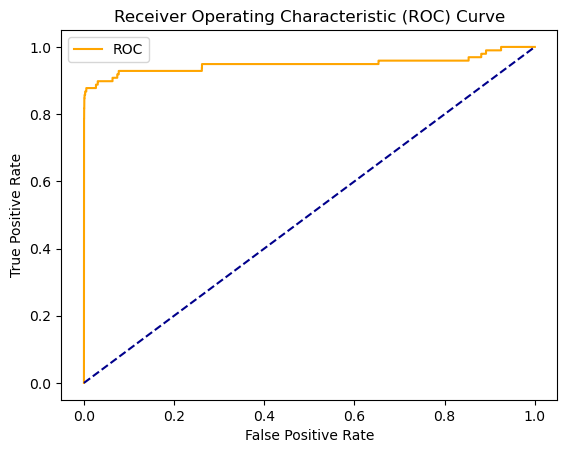

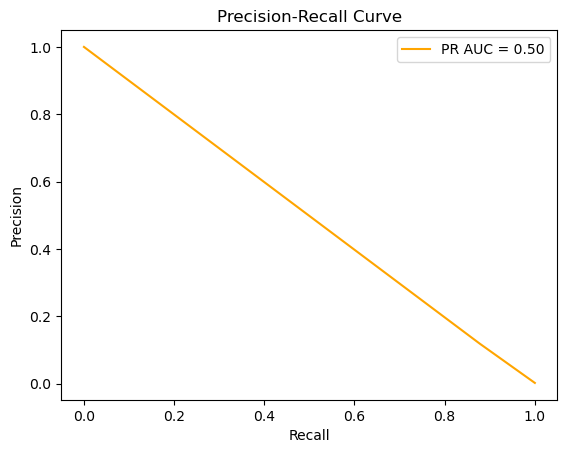

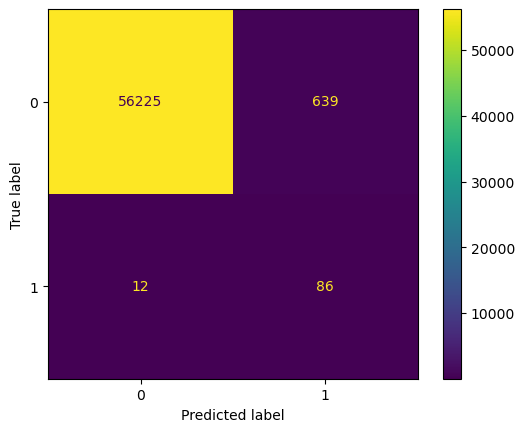

In [31]:
model_adasmt, f1_score_adasmt, accuracy_adasmt, roc_auc_adasmt, pr_auc_adasmt, tt_adasmt = run_model(model_adasmt, X_train_smt, y_train_smt, X_test, y_test)

## Model Selection (SMOTE)

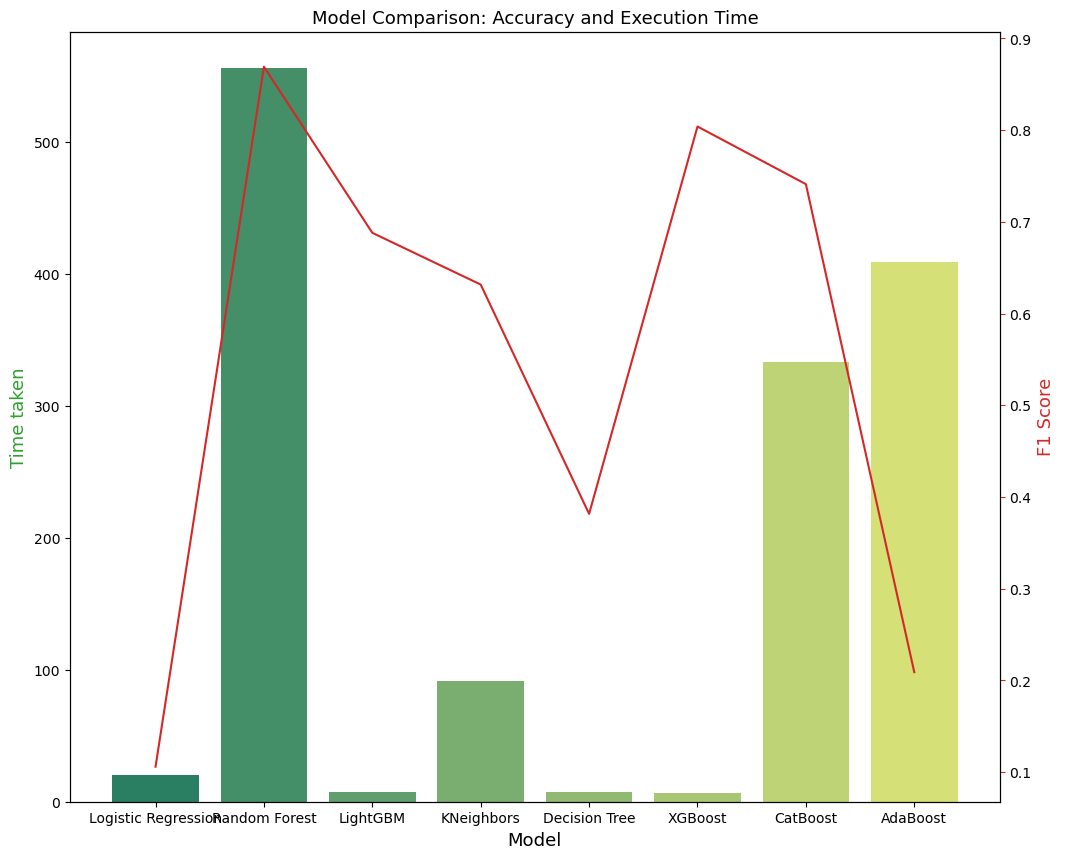

In [33]:
accuracy_scores = [accuracy_lrsmt, accuracy_rfsmt, accuracy_lgbsmt, accuracy_knn, accuracy_dtsmt, accuracy_xgbsmt, accuracy_cbsmt, accuracy_adasmt]
roc_auc_scores = [roc_auc_lrsmt, roc_auc_rfsmt, roc_auc_lgbsmt, roc_auc_knn, roc_auc_dtsmt, roc_auc_xgbsmt, roc_auc_cbsmt, roc_auc_adasmt]
f1_scores = [f1_score_lrsmt, f1_score_rfsmt, f1_score_lgbsmt, f1_score_knn, f1_score_dtsmt, f1_score_xgbsmt, f1_score_cbsmt, f1_score_adasmt]
tt = [tt_lrsmt, tt_rfsmt, tt_lgbsmt, tt_knn, tt_dtsmt, tt_xgbsmt, tt_cbsmt, tt_adasmt]

model_data = {'Model': ['Logistic Regression','Random Forest','LightGBM','KNeighbors', 'Decision Tree', 'XGBoost', 'CatBoost', 'AdaBoost'],
              'Accuracy': accuracy_scores,
              'ROC_AUC': roc_auc_scores,
              'F1 Score': f1_scores,
              'Time taken': tt}
data = pd.DataFrame(model_data)

fig, ax1 = plt.subplots(figsize=(12,10))
ax1.set_title('Model Comparison: Accuracy and Execution Time', fontsize=13)
color = 'tab:green'
ax1.set_xlabel('Model', fontsize=13)
ax1.set_ylabel('Time taken', fontsize=13, color=color)
ax2 = sns.barplot(x='Model', y='Time taken', data = data, palette='summer')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('F1 Score', fontsize=13, color=color)
ax2 = sns.lineplot(x='Model', y='F1 Score', data = data, sort=False, color=color)
ax2.tick_params(axis='y', color=color)

### Mô hình Random Forest mang lại kết quả tốt nhất với chỉ số F1_score, nhưng thời gian huấn luyện dài và tốn nhiều tài nguyên tính toán. Do đó chúng ta sẽ chọn mô hình LightGBM để tinh chỉnh và tối ưu hóa.

## Fine Tuning (Optuna)

In [34]:
import optuna  # pip install optuna
import lightgbm as lgb
from sklearn.metrics import make_scorer

def objective(trial, X_train_smt, y_train_smt):
    max_depth=trial.suggest_int('max_depth',2,14)
    param_grid = {
        #         "device_type": trial.suggest_categorical("device_type", ['gpu']),
        #"n_estimators": trial.suggest_categorical("n_estimators", 1,300 ),
        "learning_rate": trial.suggest_float("learning_rate", 0.0001, 0.3),
        "num_leaves": trial.suggest_int("num_leaves", 4, 2**max_depth),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 5, 500),
        "max_bin": trial.suggest_int("max_bin", 10, 300),
        "lambda_l1": trial.suggest_int("lambda_l1", 0, 100, step=5),
        "lambda_l2": trial.suggest_int("lambda_l2", 0, 100, step=5),
        "min_gain_to_split": trial.suggest_float("min_gain_to_split", 0, 15),
        "bagging_fraction": trial.suggest_float(
            "bagging_fraction", 0.2, 0.95, step=0.1
        ),
        "bagging_freq": trial.suggest_categorical("bagging_freq", [1]),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.2, 0.95, step=0.1)
    }


    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    model = lgb.LGBMClassifier(**param_grid)
    model.fit(X_train_smt,y_train_smt)
    scores = cross_val_score(model, X_train_smt, y_train_smt,
                             scoring=make_scorer(f1_score, average='weighted', labels=[1]),cv=cv, n_jobs=-1)
    return np.mean(scores)

### Luyện với nhiều trial để tìm ra hyperparameter tốt nhất

In [35]:
study = optuna.create_study(direction='maximize')
func = lambda trial: objective(trial, X_train_smt, y_train_smt)
study.optimize(func, n_trials=100)

### In ra hyperparamater tốt nhất

In [36]:
print(f"\tBest value (Accuracy): {study.best_value:.5f}")
print(f"\tBest params:")

for key, value in study.best_params.items():
    print(f"\t\t{key}: {value}")

### Thế vào mô hình LightGBM

[LightGBM] [Warning] min_data_in_leaf is set=459, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=459
[LightGBM] [Warning] feature_fraction is set=0.30000000000000004, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.30000000000000004
[LightGBM] [Warning] min_gain_to_split is set=12.191244592244884, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=12.191244592244884
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=90, reg_lambda=0.0 will be ignored. Current value: lambda_l2=90
[LightGBM] [Warning] bagging_fraction is set=0.4, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=459, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=459
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] min_data_in_leaf is set=459, min_child_samples=20 

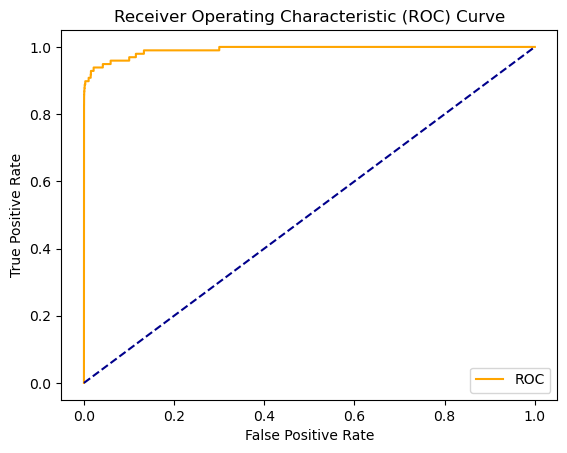

[LightGBM] [Warning] min_data_in_leaf is set=459, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=459
[LightGBM] [Warning] feature_fraction is set=0.30000000000000004, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.30000000000000004
[LightGBM] [Warning] min_gain_to_split is set=12.191244592244884, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=12.191244592244884
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=90, reg_lambda=0.0 will be ignored. Current value: lambda_l2=90
[LightGBM] [Warning] bagging_fraction is set=0.4, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


(LGBMClassifier(bagging_fraction=0.4, bagging_freq=1,
                feature_fraction=0.30000000000000004, lambda_l1=0, lambda_l2=90,
                learning_rate=0.17554166946002825, max_bin=139, max_depth=13,
                min_data_in_leaf=459, min_gain_to_split=12.191244592244884,
                num_leaves=5433),
 0.43781094527363185,
 0.9960324426810856,
 0.9470803234067967,
 0.5938042117587881,
 7.660505056381226)

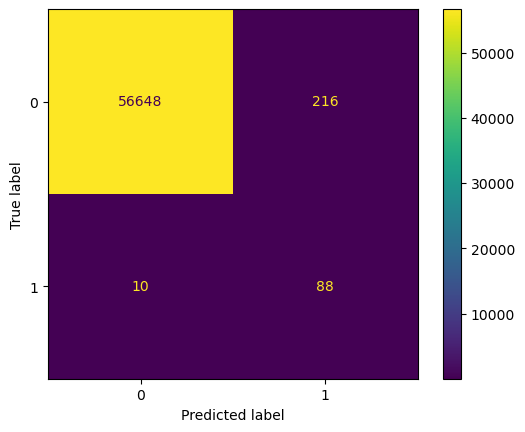

In [37]:
param_lgb = {'max_depth': 13,
		'learning_rate': 0.17554166946002825,
		'num_leaves': 5433,
		'min_data_in_leaf': 459,
		'max_bin': 139,
		'lambda_l1': 0,
		'lambda_l2': 90,
		'min_gain_to_split': 12.191244592244884,
		'bagging_fraction': 0.4,
		'bagging_freq': 1,
		'feature_fraction':  0.30000000000000004    
}

lgb_opt = lgb.LGBMClassifier(**param_lgb)
run_model(lgb_opt, X_train_smt, y_train_smt, X_test, y_test)

## Biểu diễn kết quả sau khi tuning

In [48]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
import plotly.io as pio
pio.renderers.default='notebook'

def model_performance(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_score = model.predict_proba(X_test)[:,1]

    #Conf matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    trace1 = go.Heatmap(z = conf_matrix  ,x = ["0 (pred)","1 (pred)"],
                        y = ["0 (true)","1 (true)"],xgap = 2, ygap = 2,
                        text = conf_matrix,
                        colorscale = 'Viridis', showscale  = False)

    #Show metrics
    tp = conf_matrix[1,1]
    fn = conf_matrix[1,0]
    fp = conf_matrix[0,1]
    tn = conf_matrix[0,0]
    Accuracy  =  ((tp+tn)/(tp+tn+fp+fn))
    Precision =  (tp/(tp+fp))
    Recall    =  (tp/(tp+fn))
    F1_score  =  (2*(((tp/(tp+fp))*(tp/(tp+fn)))/((tp/(tp+fp))+(tp/(tp+fn)))))

    show_metrics = pd.DataFrame(data=[[Accuracy , Precision, Recall, F1_score]])
    show_metrics = show_metrics.T

    colors = ['gold', 'lightgreen', 'lightcoral', 'lightskyblue']
    trace2 = go.Bar(x = (show_metrics[0].values), 
                   y = ['Accuracy', 'Precision', 'Recall', 'F1_score'], text = np.round_(show_metrics[0].values,4),
                    textposition = 'auto',
                   orientation = 'h', opacity = 0.8,marker=dict(
            color=colors,
            line=dict(color='#000000',width=1.5)))
    
    #Roc curve
    model_roc_auc = round(roc_auc_score(y_test, y_score) , 3)
    fpr, tpr, t = roc_curve(y_test, y_score)
    trace3 = go.Scatter(x = fpr,y = tpr,
                        name = "Roc : " + str(model_roc_auc),
                        line = dict(color = ('rgb(22, 96, 167)'),width = 2), fill='tozeroy')
    trace4 = go.Scatter(x = [0,1],y = [0,1],
                        line = dict(color = ('black'),width = 1.5,
                        dash = 'dot'))
    
    # Precision-recall curve
    precision, recall, thresholds = precision_recall_curve(y_test, y_score)
    trace5 = go.Scatter(x = recall, y = precision,
                        name = "Precision" + str(precision),
                        line = dict(color = ('lightcoral'),width = 2), fill='tozeroy')
    

    #Subplots
    fig = tls.make_subplots(rows=4, cols=2, print_grid=False, 
                          specs=[[{}, {}], 
                                 [{}, {}],
                                 [{'colspan': 2}, None],
                                 [{'colspan': 2}, None]],
                          subplot_titles=('Confusion Matrix',
                                        'Metrics',
                                        'ROC curve'+" "+ '('+ str(model_roc_auc)+')',
                                        'Precision - Recall curve',
                                        'Cumulative gains curve',
                                        'Feature importance',
                                        ))
    
    fig.append_trace(trace1,1,1)
    fig.append_trace(trace2,1,2)
    fig.append_trace(trace3,2,1)
    fig.append_trace(trace4,2,1)
    fig.append_trace(trace5,2,2)
    
    fig['layout'].update(showlegend = False, title = '<b>Model performance report</b><br>' + 'LightGBM after tuning',
                        autosize = False, height = 1500,width = 830,
                        plot_bgcolor = 'rgba(240,240,240, 0.95)',
                        paper_bgcolor = 'rgba(240,240,240, 0.95)',
                        margin = dict(b = 195))
    fig["layout"]["xaxis2"].update((dict(range=[0, 1])))
    fig["layout"]["xaxis3"].update(dict(title = "false positive rate"))
    fig["layout"]["yaxis3"].update(dict(title = "true positive rate"))
    fig["layout"]["xaxis4"].update(dict(title = "recall"), range = [0,1.05])
    fig["layout"]["yaxis4"].update(dict(title = "precision"), range = [0,1.05])
    fig["layout"]["xaxis5"].update(dict(title = "Percentage contacted"))
    fig["layout"]["yaxis5"].update(dict(title = "Percentage positive targeted"))
    fig.layout.titlefont.size = 14
    
    fig.show("notebook")
    #py.iplot(fig)


In [49]:
model_performance(lgb_opt, X_test, y_test)

[LightGBM] [Warning] min_data_in_leaf is set=459, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=459
[LightGBM] [Warning] feature_fraction is set=0.30000000000000004, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.30000000000000004
[LightGBM] [Warning] min_gain_to_split is set=12.191244592244884, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=12.191244592244884
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=90, reg_lambda=0.0 will be ignored. Current value: lambda_l2=90
[LightGBM] [Warning] bagging_fraction is set=0.4, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=459, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=459
[LightGBM] [Warn

# UNSUPERVISED

### Ứng dụng Isolation Forest vào việc phát hiện outlier